<a href="https://colab.research.google.com/github/MogoWhite/gesture_fake_video_detection/blob/main/h5topkl_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp -r /content/drive/MyDrive/oliver/ailse /content
!cp -r /content/drive/MyDrive/oliver/ccnce /content
!cp -r /content/drive/MyDrive/oliver/mix-stage /content
!cp -r /content/drive/MyDrive/oliver/real /content

In [ ]:
%cd /content/drive/MyDrive/aisle/keypoints/dev/ellen

/content/drive/MyDrive/aisle/keypoints/dev/ellen


In [ ]:
!ls -la | grep "^-" | wc -l

0


In [ ]:
!cp /content/drive/MyDrive/clyo.zip /content

In [ ]:
!unzip clyo.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: content/mix-stage/src/save/pretrained_models/multi-speaker/exp_3661_cpk_JointLateClusterSoftStyle4_G_speaker_['corden', 'lec_cosmic', 'ytch_prof', 'oliver']_model_JointLateClusterSoftStyle4_G_note_s2g_gst_mixgan15/keypoints_style/train/oliver/102961.h5  
  inflating: content/mix-stage/src/save/pretrained_models/multi-speaker/exp_3661_cpk_JointLateClusterSoftStyle4_G_speaker_['corden', 'lec_cosmic', 'ytch_prof', 'oliver']_model_JointLateClusterSoftStyle4_G_note_s2g_gst_mixgan15/keypoints_style/train/oliver/104126.h5  
  inflating: content/mix-stage/src/save/pretrained_models/multi-speaker/exp_3661_cpk_JointLateClusterSoftStyle4_G_speaker_['corden', 'lec_cosmic', 'ytch_prof', 'oliver']_model_JointLateClusterSoftStyle4_G_note_s2g_gst_mixgan15/keypoints_style/train/oliver/216848.h5  
  inflating: content/mix-stage/src/save/pretrained_models/multi-speaker/exp_3661_cpk_JointLateClusterSoftStyle4_G_speaker_['corden', 'lec_cosmic', 'ytch_prof', 'oliver']

In [ ]:
!cp -r /content/content/mix-stage/src/save/pretrained_models/multi-speaker/exp_3661_cpk_JointLateClusterSoftStyle4_G_speaker_\[\'corden\',\ \'lec_cosmic\',\ \'ytch_prof\',\ \'oliver\'\]_model_JointLateClusterSoftStyle4_G_note_s2g_gst_mixgan15/keypoints_style /content

In [ ]:
import os
import h5py
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
def process_h5_files(folder_path):
    h5_files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
    normalize_data = []
    rows_data = []
    keypoint_data = []
    for file in h5_files:
        file_path = os.path.join(folder_path, file)
        with h5py.File(file_path, 'r') as f:
            normalize = f['pose']['normalize']
            normalize = normalize[:]
            num_rows = normalize.shape[0]
            rows_data.append(num_rows)
            if normalize.ndim == 2:
                normalize[:, :1] = 0
                normalize[:, 52:53] = 0
                normalize = np.reshape(normalize, (num_rows, 2, 52))
                normalize = normalize.transpose((0, 2, 1))
                normalize = np.reshape(normalize, (1, num_rows, 52, 2))
                print(normalize)
                normalize_data.append(normalize)
            else:
                normalize = normalize.transpose((0, 2, 1))
                normalize = normalize.reshape(1, num_rows, 52, 2)
                print(normalize)
                normalize_data.append(normalize)
            matrix = np.ones((1, num_rows, 52))
            keypoint_data.append(matrix)
    return normalize_data, rows_data, keypoint_data


In [ ]:
def write_pkl(label, normalize_data, rows_data, keypoint_data, filename):
    my_tuple = (1080, 1920)
    data = []
    for i in range(len(normalize_data)):
        matrix_dict = {}
        matrix_dict['keypoint'] = normalize_data[i].astype('float16')
        matrix_dict['total_frames'] = rows_data[i]
        matrix_dict['frame_dir'] = "S008C002P007R002A048"
        matrix_dict['label'] = label
        matrix_dict['img_shape'] = my_tuple
        matrix_dict['original_shape'] = my_tuple
        matrix_dict['keypoint_score'] = keypoint_data[i].astype('float16')
        data.append(matrix_dict)

    with open(filename, 'wb') as f:
        pickle.dump(data, f)

In [ ]:
folder_path = "/content/drive/MyDrive/oliver/ailse/keypoints/train/oliver"
normalize_data, rows_data, keypoint_data = process_h5_files(folder_path)

filename = 'aisle_train_oliver_1.pkl'
label = 1
write_pkl(label, normalize_data, rows_data, keypoint_data, filename)

流式输出内容被截断，只能显示最后 5000 行内容。
   [ -46.41244285  269.03214868]
   [ -48.42912836  267.53470368]]]]
[[[[ 0.00000000e+00  0.00000000e+00]
   [-1.66934909e+02  1.05370146e+00]
   [-2.06353924e+02  2.27118864e+02]
   ...
   [-5.83942611e+01  2.74182332e+02]
   [-4.68544417e+01  2.66925593e+02]
   [-4.19190632e+01  2.71773434e+02]]

  [[ 0.00000000e+00  0.00000000e+00]
   [-1.66962867e+02  5.29985518e-01]
   [-2.07508787e+02  2.28360909e+02]
   ...
   [-6.14441393e+01  2.87042969e+02]
   [-5.02362589e+01  2.86740955e+02]
   [-4.16745560e+01  2.82128412e+02]]

  [[ 0.00000000e+00  0.00000000e+00]
   [-1.66973009e+02 -7.61549171e-02]
   [-2.07379519e+02  2.25923296e+02]
   ...
   [-6.03205802e+01  2.84347071e+02]
   [-5.01629511e+01  2.83748581e+02]
   [-3.90772207e+01  2.79125063e+02]]

  ...

  [[ 0.00000000e+00  0.00000000e+00]
   [-1.66745479e+02 -2.13242365e+00]
   [-2.40619123e+02  2.50782113e+02]
   ...
   [-2.11652577e+02  4.62424481e+01]
   [-2.06136690e+02  1.61139384e+01]
   [-2.08061

In [ ]:
folder_path = "/content/drive/MyDrive/oliver/real/train"
normalize_data, rows_data, keypoint_data = process_h5_files(folder_path)

filename = 'real_train_oliver_0.pkl'
label = 0
write_pkl(label, normalize_data, rows_data, keypoint_data, filename)

流式输出内容被截断，只能显示最后 5000 行内容。
   [-276.5763431   223.27253879]
   [-268.53048584  224.27827095]]]]
[[[[   0.            0.        ]
   [-166.98711619    2.07437411]
   [-262.40832543  215.73490787]
   ...
   [-370.27577937   79.86340339]
   [-373.38734054   57.04528814]
   [-369.23859231   63.26841048]]

  [[   0.            0.        ]
   [-167.            0.        ]
   [-244.86503067  217.20245399]
   ...
   [-360.63803681  116.79754601]
   [-367.80981595  116.79754601]
   [-368.83435583  113.72392638]]

  [[   0.            0.        ]
   [-166.98773322    2.02409374]
   [-243.90329518  225.68645156]
   ...
   [-369.39710681  119.42153042]
   [-391.66213791  129.5419991 ]
   [-398.74646598  136.62632718]]

  ...

  [[   0.            0.        ]
   [-166.70140156   -9.98211985]
   [-225.5959087   207.62809297]
   ...
   [-110.80153038  217.61021282]
   [ -85.84623075  232.5833926 ]
   [ -81.8533828   241.56730047]]

  [[   0.            0.        ]
   [-166.8087124    -7.99083652]
   

In [ ]:
folder_path = "/content/drive/MyDrive/ellen/train"
normalize_data, rows_data, keypoint_data = process_h5_files(folder_path)

filename = 'real_train_ellen_0.pkl'
label = 0
write_pkl(label, normalize_data, rows_data, keypoint_data, filename)

流式输出内容被截断，只能显示最后 5000 行内容。
   [  26.77191261  374.80677661]
   [  27.98881773  373.58987149]]]]
[[[[   0.            0.        ]
   [-166.72801285    9.52731502]
   [-228.65556048  335.83785445]
   ...
   [-192.92812915  733.60325653]
   [-178.63715662  745.51240031]
   [-185.78264289  750.27605782]]

  [[   0.            0.        ]
   [-166.72009199    9.66493287]
   [-231.95838885  345.52135006]
   ...
   [-193.29865738  785.2757956 ]
   [-190.88242416  790.10826203]
   [-193.29865738  792.52449525]]

  [[   0.            0.        ]
   [-166.35368495   14.67826632]
   [-229.95950567  344.93925851]
   ...
   [-251.97690515  721.68142738]
   [-234.85226111  753.48433773]
   [-237.29863883  755.93071545]]

  ...

  [[   0.            0.        ]
   [-166.7691775     8.77732513]
   [-197.48981546  294.04039191]
   ...
   [  57.05261335  399.36829348]
   [  72.41293233  401.56262477]
   [  92.16191388  401.56262477]]

  [[   0.            0.        ]
   [-166.03257694   17.94946778]
   

{'keypoint': array([[[[ 0.0000e+00,  0.0000e+00],
         [-1.6688e+02,  1.7861e+00],
         [-2.1550e+02,  2.2725e+02],
         ...,
         [-1.2025e+02,  2.1362e+02],
         [-1.1125e+02,  1.9688e+02],
         [-1.1106e+02,  1.9688e+02]],

        [[ 0.0000e+00,  0.0000e+00],
         [-1.6688e+02,  2.0117e+00],
         [-2.2388e+02,  2.4575e+02],
         ...,
         [-1.1925e+02,  2.0750e+02],
         [-1.1931e+02,  2.0200e+02],
         [-1.0556e+02,  2.0238e+02]],

        [[ 0.0000e+00,  0.0000e+00],
         [-1.6688e+02,  2.1660e+00],
         [-2.2062e+02,  2.4125e+02],
         ...,
         [-1.2794e+02,  2.0712e+02],
         [-1.2925e+02,  2.1350e+02],
         [-1.2244e+02,  2.0675e+02]],

        ...,

        [[ 0.0000e+00,  0.0000e+00],
         [-1.6688e+02, -4.0991e-01],
         [-2.1612e+02,  2.1975e+02],
         ...,
         [-1.1575e+02,  2.4912e+02],
         [-1.1244e+02,  2.4312e+02],
         [-9.3812e+01,  2.4525e+02]],

        [[ 0.0000e+00

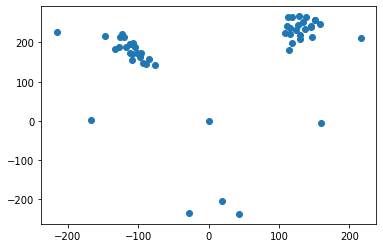

In [ ]:
import pandas as pd
pd = pd.read_pickle('/content/mixstage_ytch_prof_val_1.pkl')
print(pd[10])
pd_0=pd[10]
#data = pd[0:100]
matrix=pd_0['keypoint']
matrix = matrix[0:1,0:1,:,:]

x_vals = matrix[0,:,:,0].flatten()
y_vals = matrix[0,:,:,1].flatten()

plt.scatter(x_vals, y_vals)
plt.show()

In [ ]:
def merge_pkl_files(pkl_files, output_filename):
    # 初始化空列表
    merged_list = []
    
    # 遍历pkl_files列表，读取每一个pkl文件的数据
    for pkl_file in pkl_files:
        with open(pkl_file, "rb") as f:
            file_data = pickle.load(f)
            merged_list += file_data
    
    # 将合并后的列表写入新的pkl文件
    with open(output_filename, "wb") as f:
        pickle.dump(merged_list, f)

In [ ]:
file_list = ['/content/aisle_train_oliver_1.pkl','/content/real_train_oliver_0.pkl']
merged_file_name = 'aisle_oliver_train.pkl'
merge_pkl_files(file_list, merged_file_name)

In [ ]:
!cp /content/pats_train_label.pkl /content/drive/MyDrive/oliver/label

In [ ]:
!cp /content/pats_val_label.pkl /content/drive/MyDrive/oliver/label

In [ ]:
!cp /content/*.pkl /content/drive/MyDrive/aisle/id

In [ ]:
import os

folder = '/content/keypoints_style/train/ytch_prof'
file_list = os.listdir(folder)
num_files = len(file_list)
print("The number of files in {} is {}".format(folder, num_files))

The number of files in /content/keypoints_style/train/ytch_prof is 600
